In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

data_modeling.h5 is the dataset merged and cleaned in the previous notebook.

In [2]:
store = pd.HDFStore('all_data.h5')
data = store['all_data']

In [3]:
data.head(5)

,unique_id,Orig_Date,loan_amount,monthly_payment,grade,income,inq_last_6m,num_open_accts,revol_bal,num_tot_accts,tot_credit_bal,accts_opn_last_6m,inq_last_12m,accts_opn_last_24m,employment_length,home_ownership,int_rate,earliest_cr_line,fico,util_rate,loan_over_income,term,dti,platform_id,orig_date,loan_status,report_date,mob,bom,ppmt,ipmt,co_amt,prepay_amt,eom,prepay,default
0,A-243811-1,APR2016,20000.0,470.15,C,75000.0,0.0,15.0,35435.0,25.0,42760.0,0.0,1.0,4.0,3,RENT,14.46,83.0,667.0,76.0,0.27,60,0.1864,A,NaN,current,JAN2020,45,6804.477673,388.156044,81.993956,0.0,0.0,6416.321629,0,0
1,A-89475-2,MAY2016,6025.0,200.09,C,70000.0,3.0,21.0,8640.0,42.0,100312.0,3.0,6.0,6.0,10,MORTGAGE/OWN,11.99,98.0,682.0,31.2,0.09,36,0.3005,A,NaN,paid_off,MAY2019,36,198.001430,198.001430,1.978364,0.0,0.0,0.000000,0,0
2,A-383194-3,APR2016,5450.0,173.72,B,70000.0,0.0,6.0,5746.0,24.0,119491.0,0.0,4.0,6.0,10,MORTGAGE/OWN,9.16,188.0,687.0,56.9,0.08,36,0.0811,A,NaN,paid_off,APR2019,36,173.563628,173.563628,1.632051,0.0,0.0,0.000000,0,0
3,A-97928-4,MAY2016,6725.0,246.48,D,55000.0,1.0,6.0,8551.0,12.0,287319.0,1.0,5.0,4.0,8,MORTGAGE/OWN,18.99,82.0,662.0,77.7,0.12,36,0.0805,A,NaN,paid_off,JUN2019,37,1.524140,1.524140,0.024120,0.0,0.0,0.000000,0,0
4,A-257581-5,JUN2016,24000.0,764.99,B,125000.0,0.0,22.0,33290.0,47.0,305776.0,0.0,0.0,3.0,5,MORTGAGE/OWN,9.16,84.0,682.0,80.2,0.19,36,0.1957,A,NaN,paid_off,JUN2019,36,758.868293,758.868293,5.792695,0.0,0.0,0.000000,0,0


Perform Treatment to the Orig_Date and Report_Date so that month and year is 

In [4]:

data['Orig_year'] = pd.DatetimeIndex(pd.to_datetime(data['Orig_Date'],format='%b%Y')).year
data['Orig_month'] = pd.DatetimeIndex(pd.to_datetime(data['Orig_Date'],format='%b%Y')).month

data['report_year'] = pd.DatetimeIndex(pd.to_datetime(data['report_date'],infer_datetime_format=True)).year
data['report_month'] = pd.DatetimeIndex(pd.to_datetime(data['report_date'],infer_datetime_format=True)).month

data.drop('Orig_Date', inplace=True, axis=1)
data.drop('report_date', inplace=True, axis=1)
data.drop('orig_date', inplace=True, axis=1)

Perform Treatment to the dti


In [5]:
data.loc[(data.platform_id == 'C'),'dti']=data['dti']-data['loan_over_income']
data['post_dti'] =  data['dti'] + data['loan_over_income']

In [6]:
data.head(5)

,unique_id,loan_amount,monthly_payment,grade,income,inq_last_6m,num_open_accts,revol_bal,num_tot_accts,tot_credit_bal,accts_opn_last_6m,inq_last_12m,accts_opn_last_24m,employment_length,home_ownership,int_rate,earliest_cr_line,fico,util_rate,loan_over_income,term,dti,platform_id,loan_status,mob,bom,ppmt,ipmt,co_amt,prepay_amt,eom,prepay,default,Orig_year,Orig_month,report_year,report_month,post_dti
0,A-243811-1,20000.0,470.15,C,75000.0,0.0,15.0,35435.0,25.0,42760.0,0.0,1.0,4.0,3,RENT,14.46,83.0,667.0,76.0,0.27,60,0.1864,A,current,45,6804.477673,388.156044,81.993956,0.0,0.0,6416.321629,0,0,2016.0,4.0,2020,1,0.4564
1,A-89475-2,6025.0,200.09,C,70000.0,3.0,21.0,8640.0,42.0,100312.0,3.0,6.0,6.0,10,MORTGAGE/OWN,11.99,98.0,682.0,31.2,0.09,36,0.3005,A,paid_off,36,198.001430,198.001430,1.978364,0.0,0.0,0.000000,0,0,2016.0,5.0,2019,5,0.3905
2,A-383194-3,5450.0,173.72,B,70000.0,0.0,6.0,5746.0,24.0,119491.0,0.0,4.0,6.0,10,MORTGAGE/OWN,9.16,188.0,687.0,56.9,0.08,36,0.0811,A,paid_off,36,173.563628,173.563628,1.632051,0.0,0.0,0.000000,0,0,2016.0,4.0,2019,4,0.1611
3,A-97928-4,6725.0,246.48,D,55000.0,1.0,6.0,8551.0,12.0,287319.0,1.0,5.0,4.0,8,MORTGAGE/OWN,18.99,82.0,662.0,77.7,0.12,36,0.0805,A,paid_off,37,1.524140,1.524140,0.024120,0.0,0.0,0.000000,0,0,2016.0,5.0,2019,6,0.2005
4,A-257581-5,24000.0,764.99,B,125000.0,0.0,22.0,33290.0,47.0,305776.0,0.0,0.0,3.0,5,MORTGAGE/OWN,9.16,84.0,682.0,80.2,0.19,36,0.1957,A,paid_off,36,758.868293,758.868293,5.792695,0.0,0.0,0.000000,0,0,2016.0,6.0,2019,6,0.3857


In [7]:
X = data.drop(['default', 'prepay','unique_id', 'loan_status','bom','eom','ppmt','ipmt','prepay_amt','co_amt'], axis=1)
X_mob = X['mob']
X = X.drop('mob', axis=1)
y_default = data['default']
y_prepay = data['prepay']

In [8]:
X.head(5)

,loan_amount,monthly_payment,grade,income,inq_last_6m,num_open_accts,revol_bal,num_tot_accts,tot_credit_bal,accts_opn_last_6m,inq_last_12m,accts_opn_last_24m,employment_length,home_ownership,int_rate,earliest_cr_line,fico,util_rate,loan_over_income,term,dti,platform_id,Orig_year,Orig_month,report_year,report_month,post_dti
0,20000.0,470.15,C,75000.0,0.0,15.0,35435.0,25.0,42760.0,0.0,1.0,4.0,3,RENT,14.46,83.0,667.0,76.0,0.27,60,0.1864,A,2016.0,4.0,2020,1,0.4564
1,6025.0,200.09,C,70000.0,3.0,21.0,8640.0,42.0,100312.0,3.0,6.0,6.0,10,MORTGAGE/OWN,11.99,98.0,682.0,31.2,0.09,36,0.3005,A,2016.0,5.0,2019,5,0.3905
2,5450.0,173.72,B,70000.0,0.0,6.0,5746.0,24.0,119491.0,0.0,4.0,6.0,10,MORTGAGE/OWN,9.16,188.0,687.0,56.9,0.08,36,0.0811,A,2016.0,4.0,2019,4,0.1611
3,6725.0,246.48,D,55000.0,1.0,6.0,8551.0,12.0,287319.0,1.0,5.0,4.0,8,MORTGAGE/OWN,18.99,82.0,662.0,77.7,0.12,36,0.0805,A,2016.0,5.0,2019,6,0.2005
4,24000.0,764.99,B,125000.0,0.0,22.0,33290.0,47.0,305776.0,0.0,0.0,3.0,5,MORTGAGE/OWN,9.16,84.0,682.0,80.2,0.19,36,0.1957,A,2016.0,6.0,2019,6,0.3857


In [9]:
encoder_1 = LabelEncoder()

# Fit the encoder on the data "platform_id"
encoder_1.fit(X["platform_id"])
X_platform_id_encoded = encoder_1.transform(X["platform_id"])
X["platform_id"] = X_platform_id_encoded

# Fit the encoder on the data "grade"
encoder_2 = LabelEncoder()
encoder_2.fit(X["grade"])
X_grade_encoded = encoder_2.transform(X["grade"])
X["grade"] = X_grade_encoded

# Fit the encoder on the data "home_ownership"
encoder_3 = LabelEncoder()
encoder_3.fit(X["home_ownership"])
X_home_ownership_encoded = encoder_3.transform(X["home_ownership"])
X["home_ownership"] = X_home_ownership_encoded

1. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial.
2. Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.

LDA Regression

Eigenvalues:
[4.98027340e+00 3.22774811e+00 2.61324629e+00 2.01923359e+00
 1.50034869e+00 1.23216351e+00 1.10997472e+00 1.03554573e+00
 9.99309411e-01 9.96814689e-01 9.74163355e-01 9.39397581e-01
 8.11381719e-01 6.98349595e-01 6.48742206e-01 6.10642850e-01
 5.15099376e-01 4.40463762e-01 4.24844659e-01 3.16118672e-01
 2.71863876e-01 2.46044949e-01 2.12337182e-01 9.32524876e-02
 6.87383799e-02 1.37555053e-02 1.90768155e-04]

Variances (Percentage):
[1.84454263e+01 1.19546027e+01 9.67867381e+00 7.47863044e+00
 5.55683771e+00 4.56356094e+00 4.11101061e+00 3.83534814e+00
 3.70113979e+00 3.69190010e+00 3.60800641e+00 3.47924449e+00
 3.00511246e+00 2.58647567e+00 2.40274490e+00 2.26163641e+00
 1.90777228e+00 1.63134454e+00 1.57349611e+00 1.17080794e+00
 1.00690157e+00 9.11276069e-01 7.86432697e-01 3.45379007e-01
 2.54586167e-01 5.09462311e-02 7.06547544e-04]



Text(0, 0.5, 'Explained variance (%)')

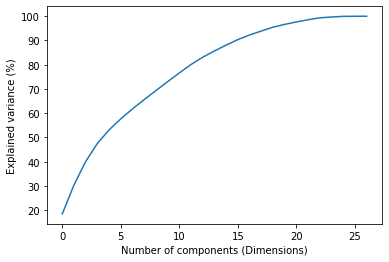

In [10]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X.fillna(0))

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

Logistic Regression

In [11]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X.fillna(0))

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 10)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0         1         2         3         4         5         6  \
0  1.608011 -0.387884  0.925088  1.670033  0.216161  0.015786 -0.225955   
1  2.939153  0.655936  1.282200 -2.376386 -1.244031  0.312945 -0.368484   
2  1.627467 -1.123700  0.861450 -1.336928  0.338891 -0.982764 -0.323462   
3  1.629188 -0.311982  2.477002 -0.016078 -0.158935 -1.224822  0.514440   
4  3.773955 -0.422303 -0.944299  1.253764  0.580358 -0.305670  0.187035   

          7         8         9  
0 -0.433505 -0.022450  0.107837  
1  1.136069 -0.026212 -0.173816  
2  0.618569  0.121103 -0.200741  
3  0.833583  0.133023 -0.259280  
4  1.412736 -0.132100 -0.349214  

Size: 
(599303, 10)


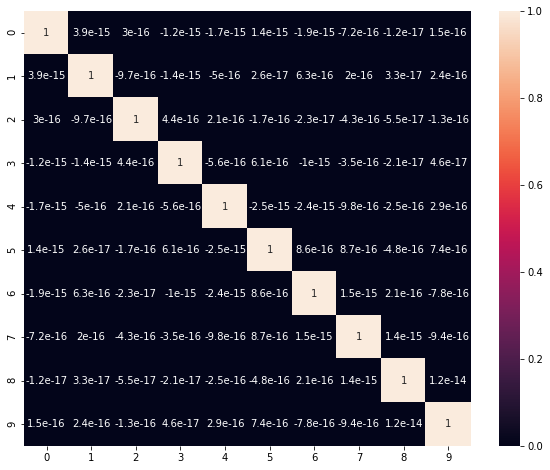

In [12]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)

In [13]:
store = pd.HDFStore('X_pca_with_date.h5')
store['X_pca_with_date'] = X_pca  # save it

store = pd.HDFStore('X_mob.h5')
store['X_mob'] = X_mob  # save it

store = pd.HDFStore('y_default.h5')
store['y_default'] = y_default  # save it

store = pd.HDFStore('y_prepay.h5')
store['y_prepay'] = y_prepay  # save it
